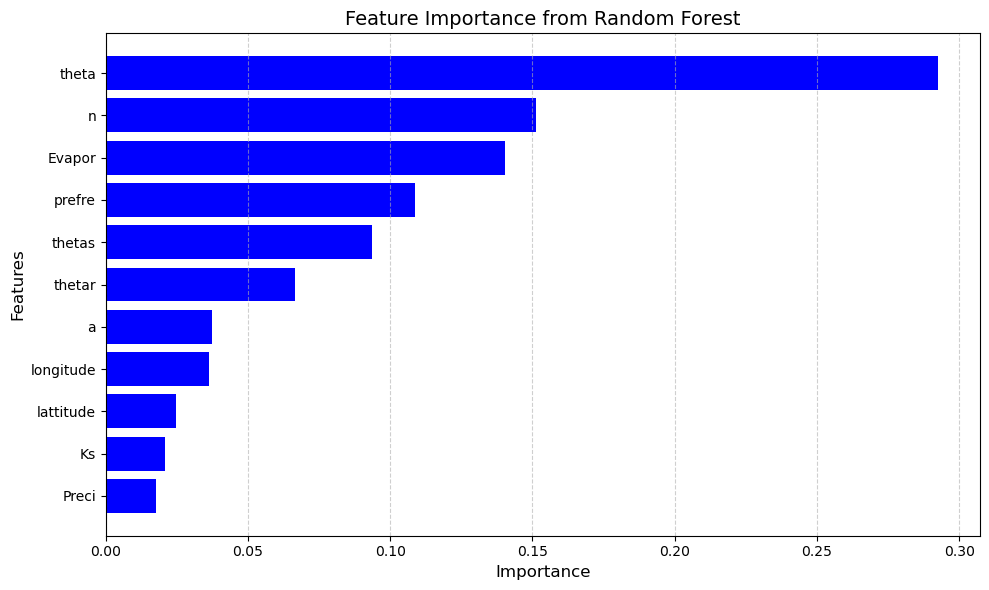

In [5]:
import matplotlib.pyplot as plt

# Data
features = [
    "theta", "n", "Evapor", "prefre", "thetas", 
    "thetar", "a", "longitude", "lattitude", "Ks", "Preci"
]
importance = [
    0.292685022, 0.151396721, 0.140375955, 0.108846734, 
    0.093432794, 0.066487631, 0.037378569, 0.036110716, 
    0.024603782, 0.020984206, 0.01769787
]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color="blue")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance from Random Forest", fontsize=14)
plt.gca().invert_yaxis()  # To have the highest importance on top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()



  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Unique values in 'type': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
          n    thetas    thetar        Ks         a   theta         Preci  \
0  1.301482  0.440550  0.083624  0.004150  0.022836  0.0974  1.219167e-07   
1  1.259201  0.460113  0.077164  0.000265  0.020929  0.0874  1.600041e-05   
2  1.304280  0.425900  0.083229  0.000384  0.032892  0.0950  1.055186e-06   
3  1.302884  0.383184  0.098162  0.000357  0.021017  0.3352  1.524233e-05   
4  1.302307  0.531867  0.060446  0.000243  0.041365  0.4622  2.232972e-05   

         Evapor  prefre  lattitude  longitude      region  
0 -5.648222e-07     358      26.00      18.00      desert  
1 -2.188546e-05     363      48

c:\Users\Tiff\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


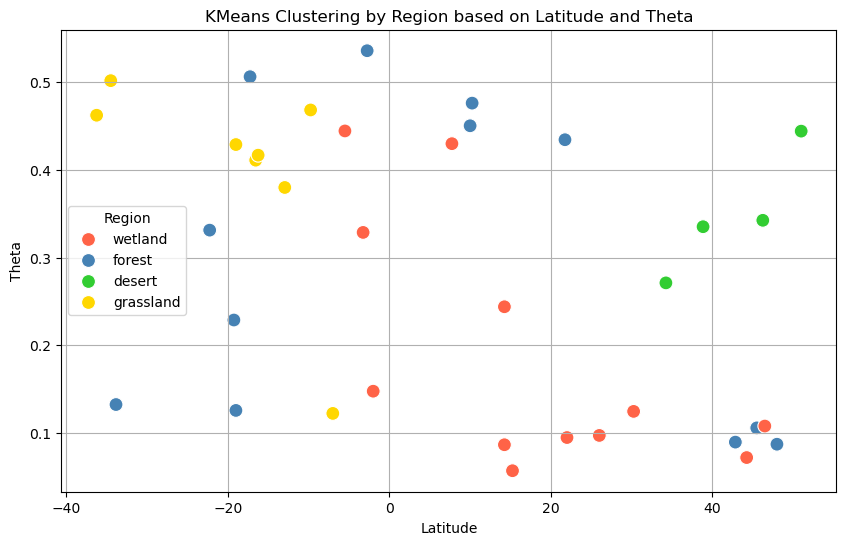

In [4]:
# Preparing the data from Sheet2 for machine learning
%pip install openpyxl
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data from Sheet2
sheet2_data = pd.read_excel('data.xlsx')

# Dropping the 'Unnamed: 0' column if it exists
sheet2_data = sheet2_data.drop(columns=['Unnamed: 0'], errors='ignore')

# Separating features and target variable
X = sheet2_data.drop(columns=['type'])
y = sheet2_data['type']

# Displaying the unique values in the target variable and the first few rows of the features
unique_types = y.unique()
X_head = X.head()

print("Unique values in 'type':", unique_types)
print(X_head)


# Encoding categorical features
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shapes of the resulting datasets
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape

# Setting the random state for reproducibility
random_state = 42

# Applying KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=random_state, max_iter=500, n_init=10)
# Fitting the model to the features
X['Cluster'] = kmeans.fit_predict(X)

# Mapping cluster labels to region names
region_mapping = {0: 'forest', 1: 'grassland', 2: 'wetland', 3: 'desert'}
X['Region'] = X['Cluster'].map(region_mapping)

# Creating a KMeans scatter plot with distinct colors for each region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='lattitude', y='theta', hue='Region', palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700'], s=100)
plt.title('KMeans Clustering by Region based on Latitude and Theta')
plt.xlabel('Latitude')
plt.ylabel('Theta')
plt.legend(title='Region')
plt.grid(True)
plt.show()

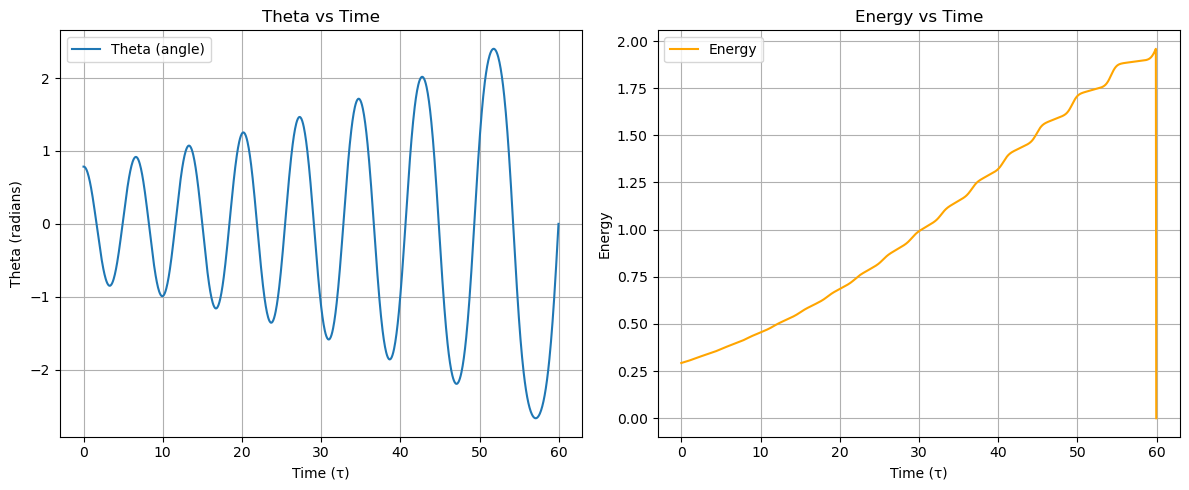

In [ ]:
# Forward Euler Method Implementation
import numpy as np
import matplotlib.pyplot as plt

# Pendulum parameters
dt = 0.05  # Time step
T = 60     # Total time
theta_0 = np.pi / 4  # Initial angle (radians)
omega_0 = 0          # Initial angular velocity (radians/τ)

# Time array
time = np.arange(0, T, dt)
n_steps = len(time)

# Initialize arrays for theta, omega, and energy
theta = np.zeros(n_steps)
omega = np.zeros(n_steps)
energy = np.zeros(n_steps)

# Initial conditions
theta[0] = theta_0
omega[0] = omega_0

# Forward Euler method
for i in range(n_steps - 1):
    omega[i + 1] = omega[i] - dt * np.sin(theta[i])
    theta[i + 1] = theta[i] + dt * omega[i]
    energy[i] = 0.5 * omega[i]**2 + (1 - np.cos(theta[i]))

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time, theta, label="Theta (angle)")
plt.xlabel("Time (τ)")
plt.ylabel("Theta (radians)")
plt.title("Theta vs Time")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, energy, label="Energy", color='orange')
plt.xlabel("Time (τ)")
plt.ylabel("Energy")
plt.title("Energy vs Time")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


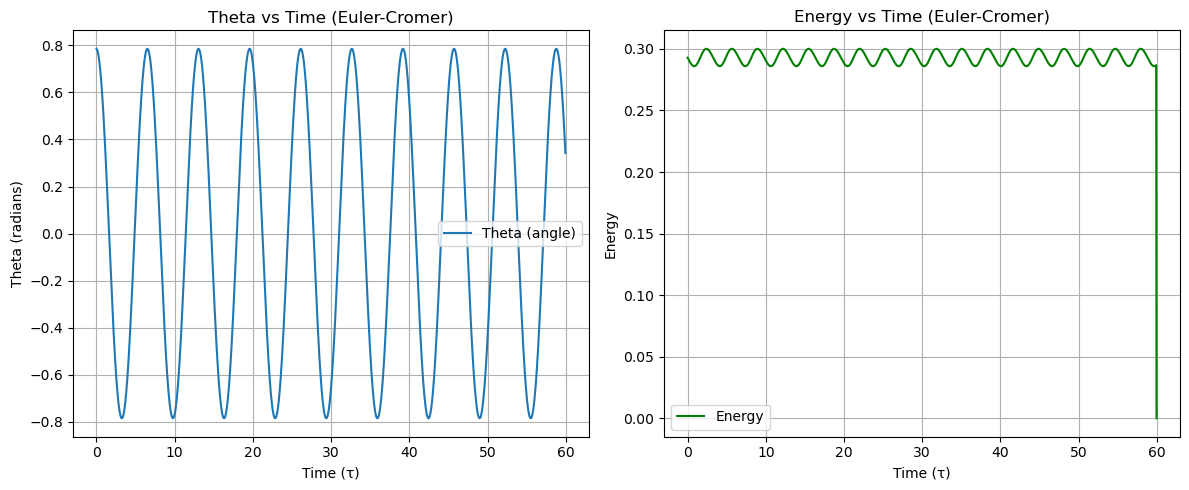

In [4]:
# Euler-Cromer Method
for i in range(n_steps - 1):
    omega[i + 1] = omega[i] - dt * np.sin(theta[i])
    theta[i + 1] = theta[i] + dt * omega[i + 1]
    energy[i] = 0.5 * omega[i]**2 + (1 - np.cos(theta[i]))

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time, theta, label="Theta (angle)")
plt.xlabel("Time (τ)")
plt.ylabel("Theta (radians)")
plt.title("Theta vs Time (Euler-Cromer)")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, energy, label="Energy", color='green')
plt.xlabel("Time (τ)")
plt.ylabel("Energy")
plt.title("Energy vs Time (Euler-Cromer)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
# 1.3

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.460e-02 ...  7.739e+01  7.747e+01]
        y: [[ 3.129e+00  3.129e+00 ...  3.128e+00  3.128e+00]
            [ 0.000e+00 -8.124e-04 ... -1.282e-03 -2.396e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1106
     njev: 0
      nlu: 0


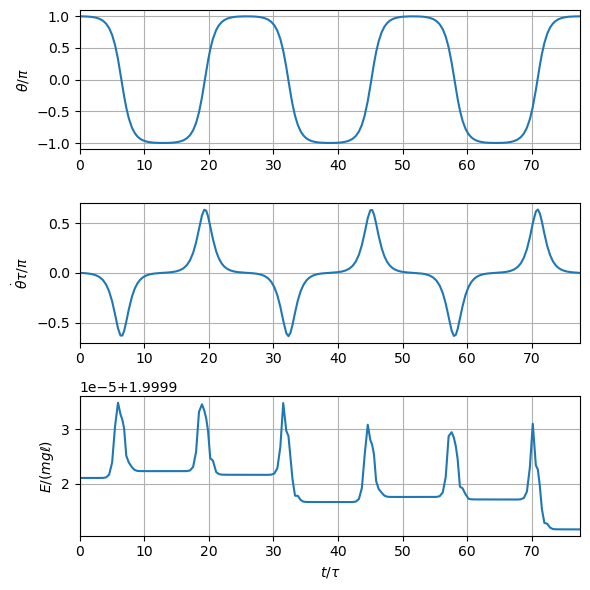

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import ellipk


def rhs(time, xvector):
    """ This function is the right hand side of the system of equations
    solved by solve_ivp. Given the array "state" which contains theta
    and thetadot we return the time derivatives of these """

    x1dot = xvector[1]
    x2dot = - np.sin(xvector[0])

    return [x1dot, x2dot]


# Our initial conditions
theta0 = 0.996 * np.pi
thetadot0 = 0.0
T = 4*ellipk(np.sin(theta0/2)**2)  # Period of NL pendulum

start = 0.0  # Initial time
end = 3*T  # Final time: three pendulum periods

# Call solve_ivp with the name of our right hand side function
# and an array of the initial conditions in the same order
# the rhs function expects them in
output = solve_ivp(rhs, [start, end], [theta0, thetadot0], rtol=1e-5)
print(output)  # to show what solve_ivp returns

# Get theta and thetadot out of the solution (returnebd by solve_ivp)
# and calculate the energy
t_out = output.t
theta = output.y[0]
thetadot = output.y[1]
energy = 1 - np.cos(theta) + .5*thetadot**2

# Plot both theta, theta-dot, and the energy
plt.figure(figsize=(6, 6))  # make the figure a bit taller for the 3 plots

plt.subplot(3, 1, 1)
plt.plot(t_out, theta/np.pi)
plt.ylabel(r'$\theta/\pi$')
plt.xlim(start, end)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_out, thetadot/np.pi)
plt.ylabel(r'$\dot \theta\tau/\pi$')
plt.xlim(start, end)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_out, energy)
plt.ylabel(r'$E/(mg\ell)$')
plt.xlabel(r'$t/\tau$')
plt.xlim(start, end)
plt.grid()

plt.tight_layout()

plt.show()


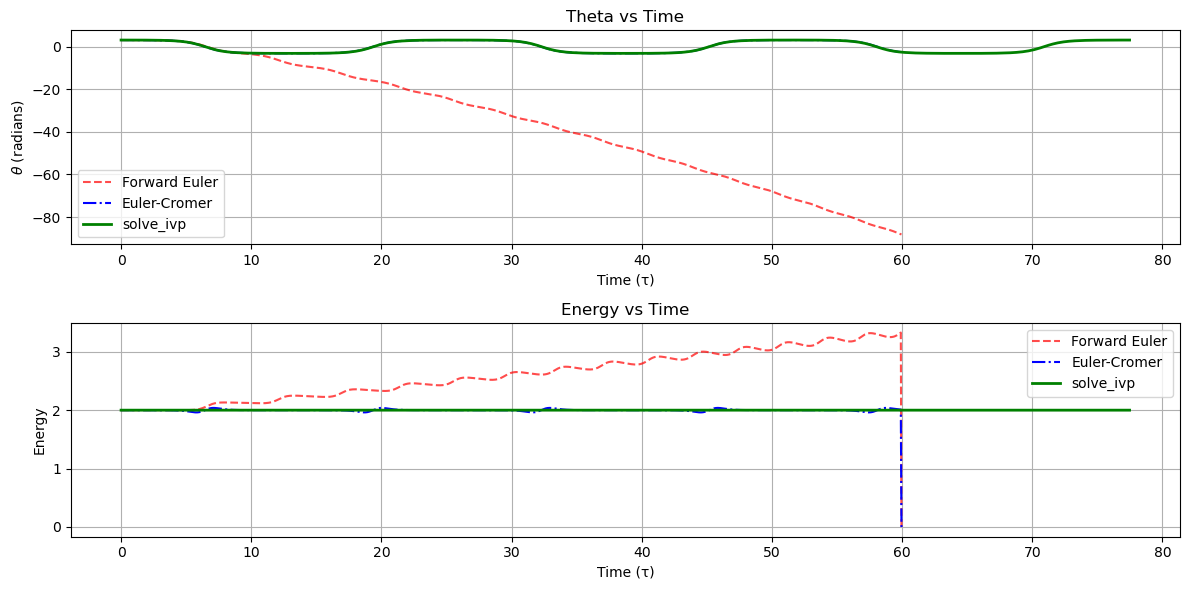

In [9]:
# Forward Euler Method
dt = 0.05  # Time step
time = np.arange(0, 60, dt)
n_steps = len(time)

theta_euler = np.zeros(n_steps)
omega_euler = np.zeros(n_steps)
energy_euler = np.zeros(n_steps)

# Initial conditions
theta_euler[0] = theta0
omega_euler[0] = thetadot0

for i in range(n_steps - 1):
    omega_euler[i + 1] = omega_euler[i] - dt * np.sin(theta_euler[i])
    theta_euler[i + 1] = theta_euler[i] + dt * omega_euler[i]
    energy_euler[i] = 1 - np.cos(theta_euler[i]) + 0.5 * omega_euler[i]**2


# Euler-Cromer Method
theta_cromer = np.zeros(n_steps)
omega_cromer = np.zeros(n_steps)
energy_cromer = np.zeros(n_steps)

# Initial conditions
theta_cromer[0] = theta0
omega_cromer[0] = thetadot0

for i in range(n_steps - 1):
    omega_cromer[i + 1] = omega_cromer[i] - dt * np.sin(theta_cromer[i])
    theta_cromer[i + 1] = theta_cromer[i] + dt * omega_cromer[i + 1]
    energy_cromer[i] = 1 - np.cos(theta_cromer[i]) + 0.5 * omega_cromer[i]**2


plt.figure(figsize=(12, 6))

# Plot for theta
plt.subplot(2, 1, 1)
plt.plot(time, theta_euler, label="Forward Euler", linestyle="--", alpha=0.7, color='red')
plt.plot(time, theta_cromer, label="Euler-Cromer", linestyle="-.", color='blue')
plt.plot(t_out, theta, label="solve_ivp", linewidth=2, color='green')
plt.xlabel("Time (τ)")
plt.ylabel(r"$\theta$ (radians)")
plt.title("Theta vs Time")
plt.legend()
plt.grid()

# Plot for energy
plt.subplot(2, 1, 2)
plt.plot(time, energy_euler, label="Forward Euler", linestyle="--", alpha=0.7, color='red')
plt.plot(time, energy_cromer, label="Euler-Cromer", linestyle="-.", color='blue')
plt.plot(t_out, energy, label="solve_ivp", linewidth=2, color='green')
plt.xlabel("Time (τ)")
plt.ylabel("Energy")
plt.title("Energy vs Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
